In [1]:
import os
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import time


In [2]:
os.chdir(r'G:\공유 드라이브\SicParvisMagna\데이터\코로나_매출')
df_covid = pd.read_csv('대구구별_확진자수_21-01-02~21-07-20.csv')
df_covid

,Unnamed: 0,수성,달서,북,서,중,남,달성,동
0,2021-01-02,13,5,4,5,0,2,2,2
1,2021-01-03,7,6,1,6,1,2,1,2
2,2021-01-04,12,5,3,0,1,1,0,7
3,2021-01-05,21,3,1,0,0,0,1,5
4,2021-01-06,10,4,1,4,1,1,0,2
...,...,...,...,...,...,...,...,...,...
195,2021-07-16,13,5,3,2,1,1,1,4
196,2021-07-17,3,6,2,4,4,3,2,4
197,2021-07-18,11,12,10,2,2,1,1,2
198,2021-07-19,2,4,10,4,4,5,0,2


In [3]:
df_sales = pd.read_csv('일별매출_2021-01-02~2021-07-20.csv')
df_sales

,Unnamed: 0,남김천휴게소(무보까국밥),무보까국밥(구평점),무보까국밥(상인점),무보까국밥(서구점),무보까국밥(서문점),무보까국밥(석적점),무보까국밥(성서점),무보까국밥(신평점),무보까국밥(안동점),무보까국밥(엑스코점),무보까국밥(옥계점),무보까국밥(용산점),무보까국밥(원대점),무보까국밥(장기점),무보까국밥(평리점),무보까국밥(황상점),무보까국밥과보쌈(신서점)
0,2021-01-02,0,"697,000","860,000","517,500","140,000","1,649,000","2,234,500","546,500","614,000","52,500","1,389,500","862,500","244,000","625,000","895,000","468,000","1,173,000"
1,2021-01-03,0,"684,500","874,500","1,039,500","67,500","1,581,000","2,287,000","335,500",0,"151,500","1,256,500","912,000","133,500","842,000","952,500","555,500","1,503,000"
2,2021-01-04,"93,000","581,500","712,500","736,000","277,500","1,623,500","1,715,500",0,"1,160,000","266,000","976,000","473,500","284,000","501,500","940,500","637,000","1,247,000"
3,2021-01-05,"100,000","809,000","900,500","618,500","309,500","1,349,500","1,840,000","808,000","673,500","174,500","858,000","745,000","346,500","710,500","446,000","380,000","1,047,000"
4,2021-01-06,"30,000","1,025,500","787,000","383,000","135,000","1,316,500","1,612,000",0,"755,000","111,000","1,197,500","456,000","89,000","652,500","835,500","375,000","1,351,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2021-07-16,"38,500","1,286,500","922,500","417,000","122,000","2,340,000","1,647,000","541,500","498,500","361,000","2,198,000","501,000","244,500","850,500",0,"524,500","1,045,000"
196,2021-07-17,"37,500","1,431,000","1,174,000","417,500","80,000","3,173,500","3,041,500","447,500",0,"688,000","2,830,000","481,500","276,000","1,065,000",0,"562,000","1,396,000"
197,2021-07-18,0,"1,355,000","1,432,500","799,000","154,500","1,702,000","3,012,000","759,000",0,"343,500","1,686,500","801,000","217,500","1,080,500",0,"836,500","1,550,000"
198,2021-07-19,"102,000","1,322,500","783,000","386,000","435,500","2,161,500","1,858,000","359,500","450,000","45,500","1,902,000","878,500","130,000","608,000",0,"516,000","1,116,000"


## 달서구 확진자 수 VS 장기점 매출

### x = 확진자 수, y = 매출
확진자 수 x 를 넣으면 매출이 y 일것이다!

In [67]:
dalseo_jangki = pd.DataFrame()
dalseo_jangki['covid_dalseo'] = df_covid['달서']
dalseo_jangki['sales_jangki'] = [int(a.replace(',', '')) for a in df_sales['무보까국밥(장기점)']]
dalseo_jangki

,covid_dalseo,sales_jangki
0,5,625000
1,6,842000
2,5,501500
3,3,710500
4,4,652500
...,...,...
195,5,850500
196,6,1065000
197,12,1080500
198,4,608000


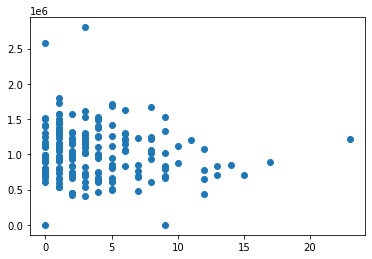

In [68]:
x = dalseo_jangki['covid_dalseo']
y = dalseo_jangki['sales_jangki']
plt.plot(x, y, 'o')

In [69]:
line_fitter = LinearRegression()
line_fitter.fit(x.values.reshape(-1, 1), y) ## x 는 2차원이여야하기 때문에 reshape

LinearRegression()

In [71]:
line_fitter.coef_

array([-12853.07198095])

In [70]:
print(line_fitter.predict([[10]])) # 611,000
print(line_fitter.predict([[7]])) # 715,000
print(line_fitter.predict([[14]])) # 578,500
print(line_fitter.predict([[10]])) # 613,000

[938630.77788233]
[977189.99382516]
[887218.48995854]
[938630.77788233]


In [ ]:
model.score(train_features, train_labels)

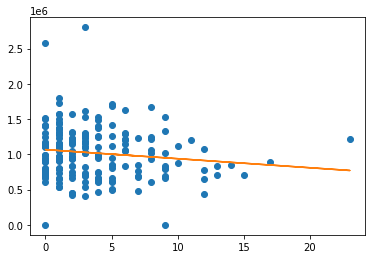

In [22]:
plt.plot(x, y, 'o')
plt.plot(x, line_fitter.predict(x.values.reshape(-1,1)))
plt.show()

In [65]:
x_ = x[:-1]

In [66]:
y_ = y[1:].reset_index(drop = True)

In [67]:
line_fitter = LinearRegression()
line_fitter.fit(x_.values.reshape(-1, 1), y_) ## x 는 2차원이여야하기 때문에 reshape

LinearRegression()

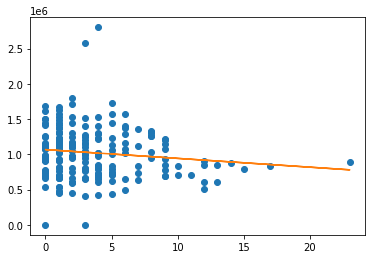

In [68]:
plt.plot(x_, y_, 'o')
plt.plot(x_, line_fitter.predict(x_.values.reshape(-1,1)))
plt.show()

#### 시차 줘보기

In [65]:
date = []
coef = []
for a in range(1, 15) :
    x_ = x[:185]
    y_ = y[1+a:186+a].reset_index(drop = True)
    
    line_fitter = LinearRegression()
    line_fitter.fit(x_.values.reshape(-1, 1), y_)
#     print('{}일 전' .format(a))
#     print(line_fitter.coef_)
    date.append('{}일 전' .format(a))
    coef.append(line_fitter.coef_)
    
    #plt.plot(x_, y_, 'o')
    #plt.plot(x_, line_fitter.predict(x_.values.reshape(-1, 1)))
    #plt.show()
    #plt.savefig('fig{}.png' .format(200-a), dpi=300)
   # time.sleep(1)

In [54]:
for a in range(1, 16) :
    #print(a)
    print(y[a+1:186+a])

2       501500
3       710500
4       652500
5       831000
6       749500
        ...   
182    1567000
183     913500
184     951500
185    1099500
186    1166000
Name: sales_jangki, Length: 185, dtype: int64
3       710500
4       652500
5       831000
6       749500
7       807500
        ...   
183     913500
184     951500
185    1099500
186    1166000
187     670500
Name: sales_jangki, Length: 185, dtype: int64
4       652500
5       831000
6       749500
7       807500
8       439500
        ...   
184     951500
185    1099500
186    1166000
187     670500
188    1297000
Name: sales_jangki, Length: 185, dtype: int64
5       831000
6       749500
7       807500
8       439500
9       901000
        ...   
185    1099500
186    1166000
187     670500
188    1297000
189    1041000
Name: sales_jangki, Length: 185, dtype: int64
6       749500
7       807500
8       439500
9       901000
10      658500
        ...   
186    1166000
187     670500
188    1297000
189    1041000
190   

In [66]:
df_coef = pd.DataFrame()
df_coef['date'] = date
df_coef['coef'] = [int(a) for a in coef]
df_coef
#df_coef.to_csv('jangki_lag.csv', encoding = 'cp949', index = False)

,date,coef
0,1일 전,-15367
1,2일 전,-14190
2,3일 전,-16828
3,4일 전,-18655
4,5일 전,-19035
5,6일 전,-13460
6,7일 전,-23555
7,8일 전,-21085
8,9일 전,-17135
9,10일 전,-21068


## 달서구 확진자 수 VS 성서점 매출

### x = 확진자 수, y = 매출

In [23]:
dal_seong = pd.DataFrame()
dal_seong['covid'] = df_covid['달서']
dal_seong['성서'] = [int(a.replace(',', '')) for a in df_sales['무보까국밥(성서점)']]
dal_seong

,covid,성서
0,5,2234500
1,6,2287000
2,5,1715500
3,3,1840000
4,4,1612000
...,...,...
195,5,1647000
196,6,3041500
197,12,3012000
198,4,1858000


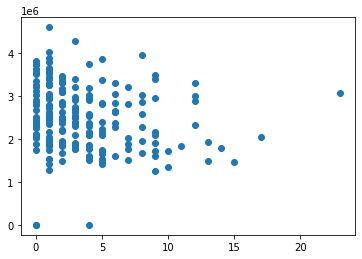

In [24]:
x2 = dal_seong['covid']
y2 = dal_seong['성서']
plt.plot(x2, y2, 'o')

In [89]:
line_fitter2 = LinearRegression()
line_fitter2.fit(x2.values.reshape(-1, 1), y2) ## x 는 2차원이여야하기 때문에 reshape

LinearRegression()

In [92]:
print(line_fitter2.predict([[10]])) # 1,791,000
print(line_fitter2.predict([[7]])) # 1,749,500
print(line_fitter2.predict([[14]])) # 1,819,000
print(line_fitter2.predict([[10]])) # 2,514,500

[2285791.65809051]
[2390586.44402952]
[2146065.27683848]
[2285791.65809051]


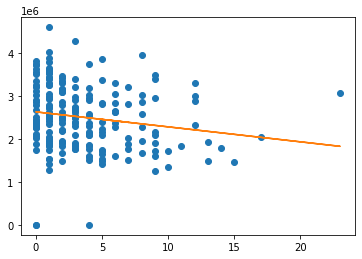

In [34]:
plt.plot(x2, y2, 'o')
plt.plot(x2, line_fitter2.predict(x2.values.reshape(-1,1)))
plt.show()

#### 시차 줘보기

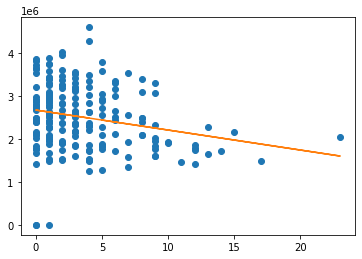

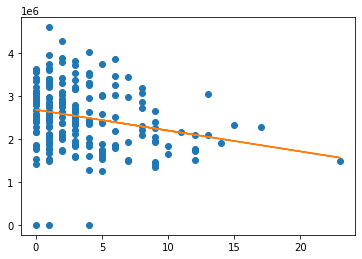

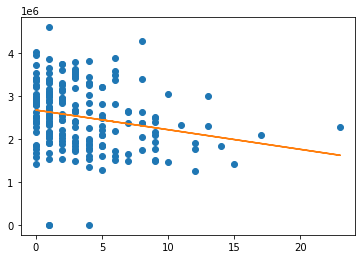

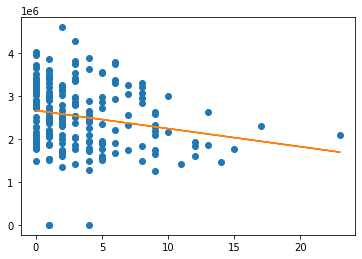

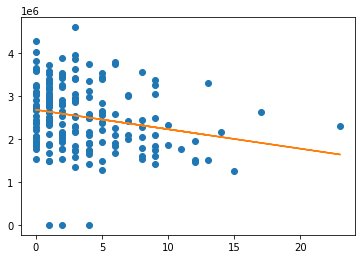

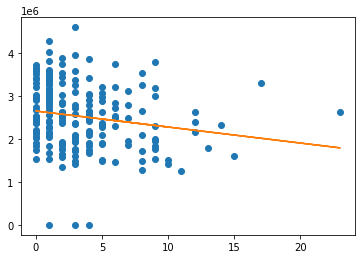

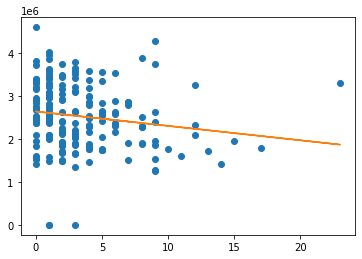

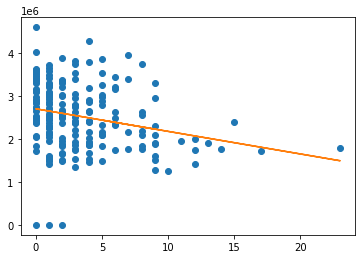

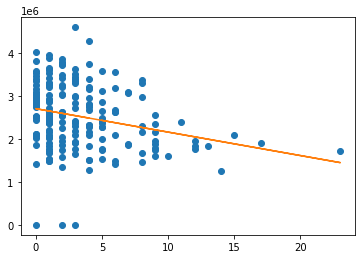

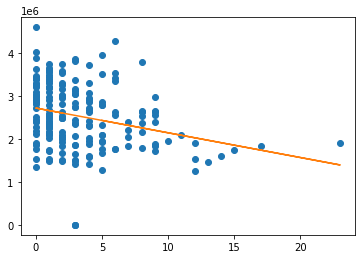

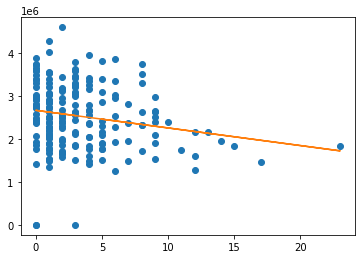

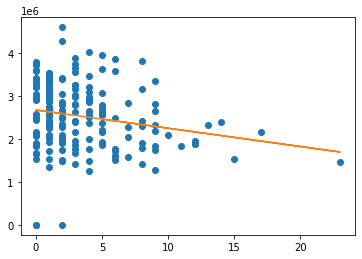

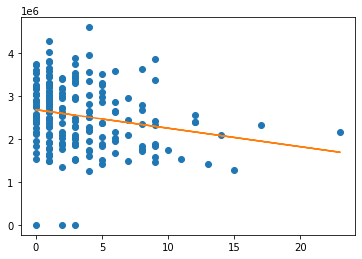

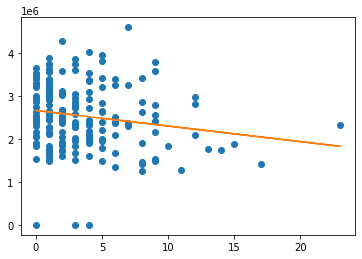

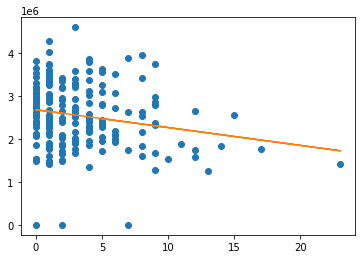

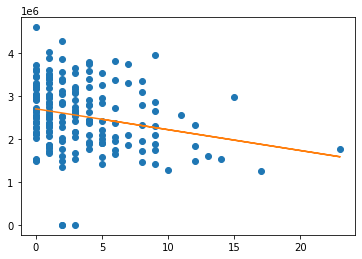

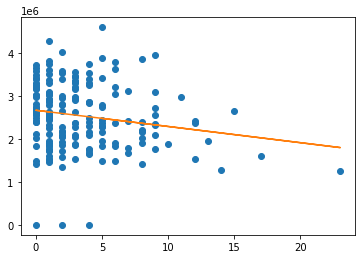

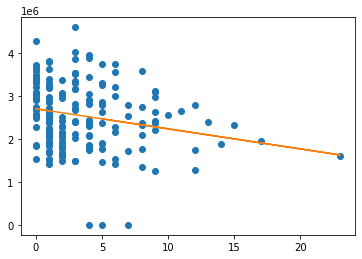

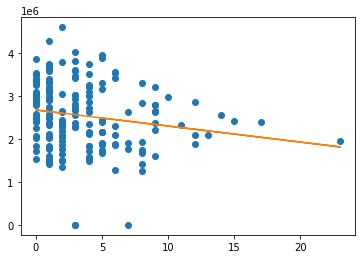

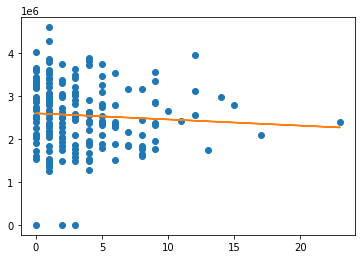

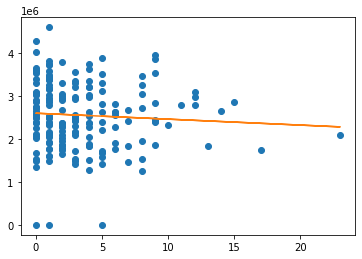

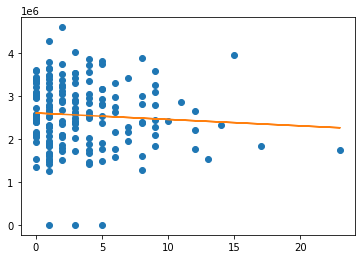

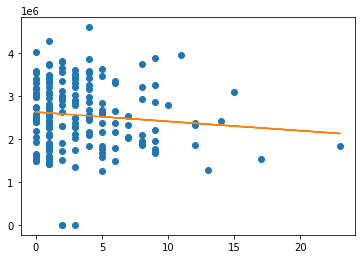

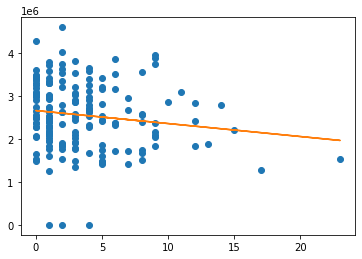

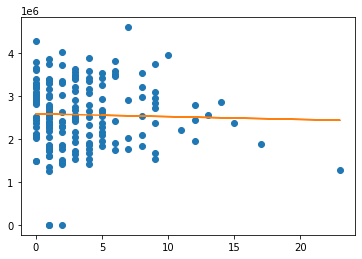

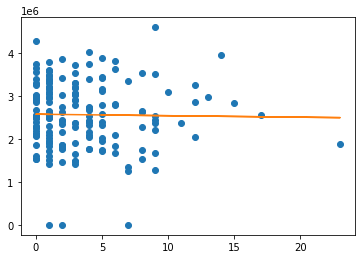

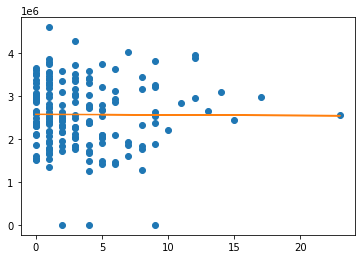

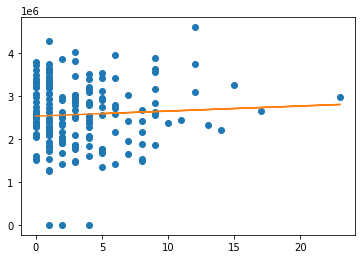

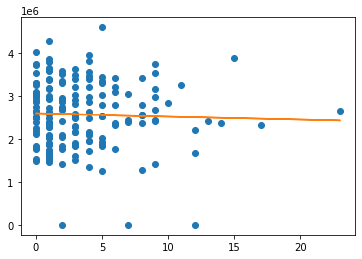

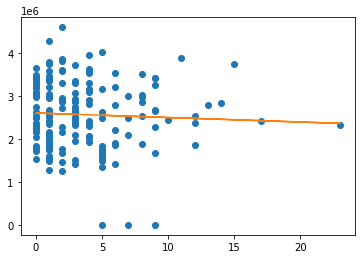

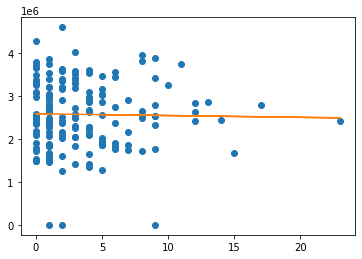

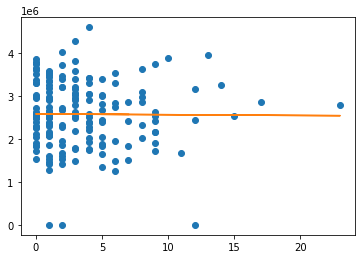

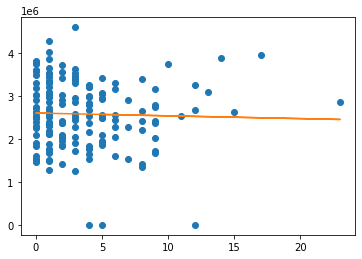

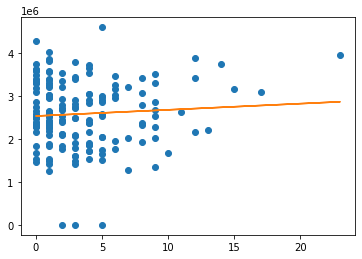

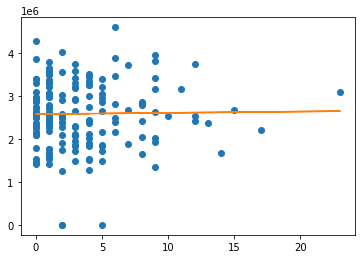

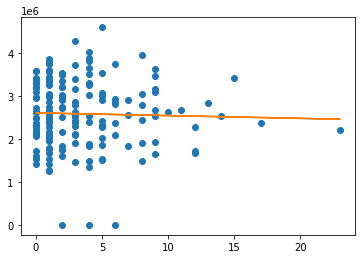

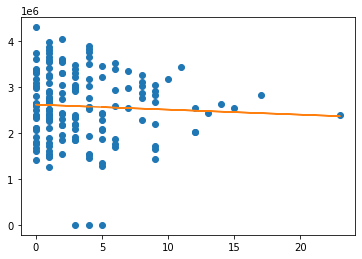

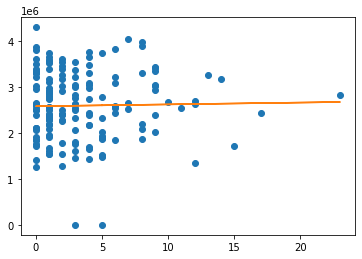

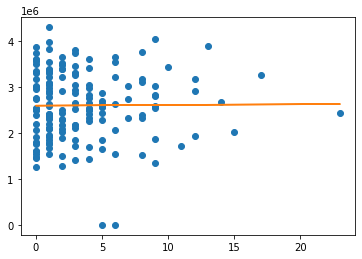

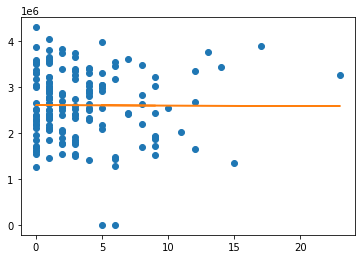

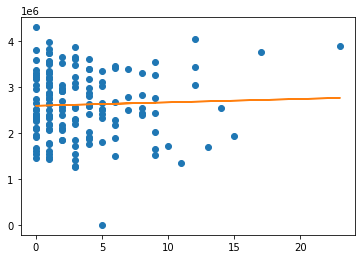

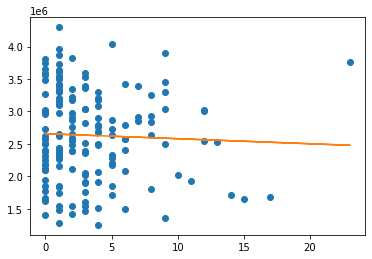

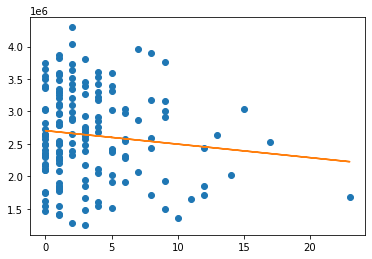

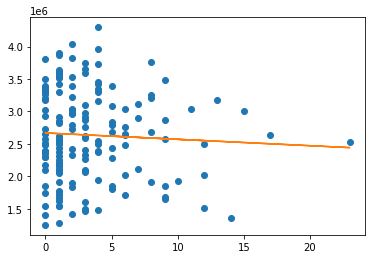

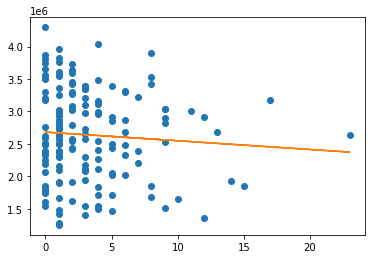

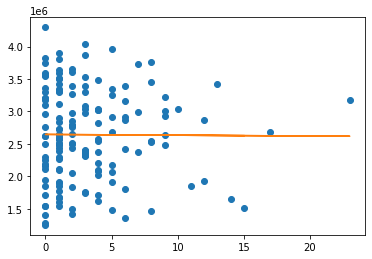

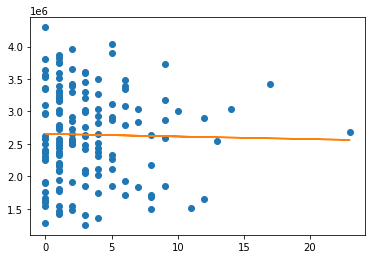

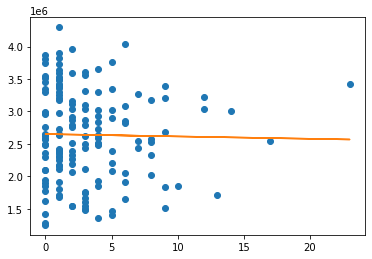

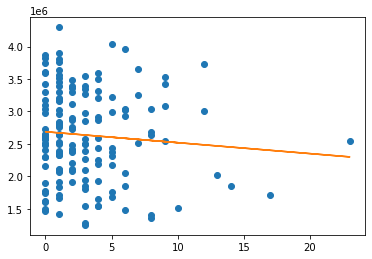

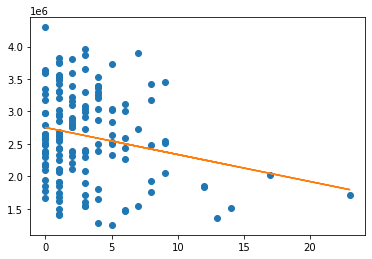

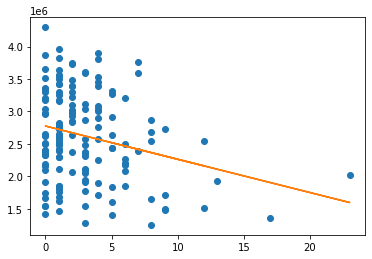

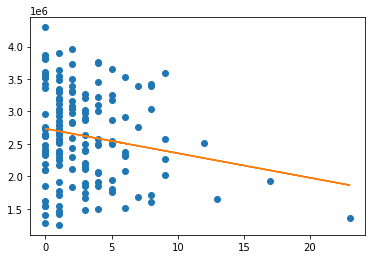

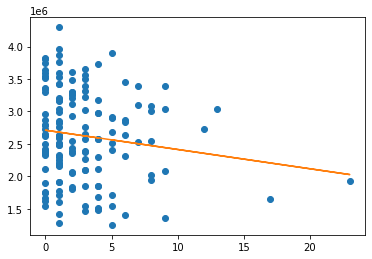

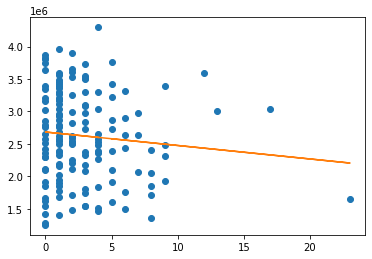

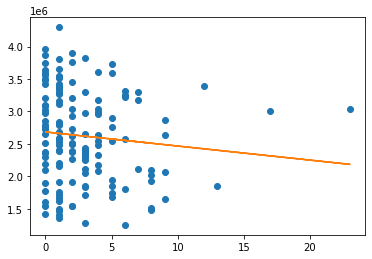

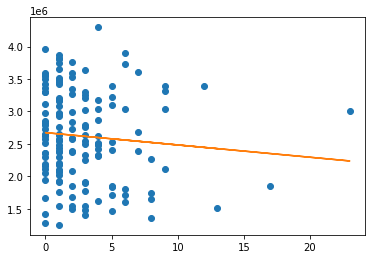

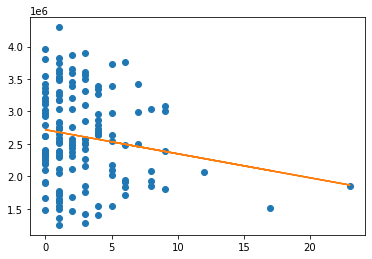

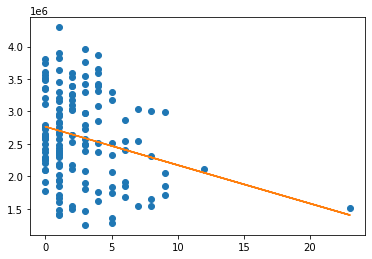

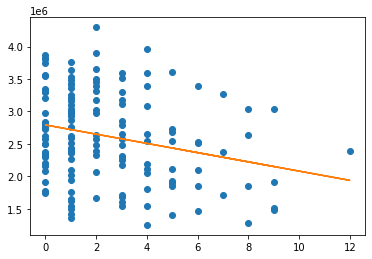

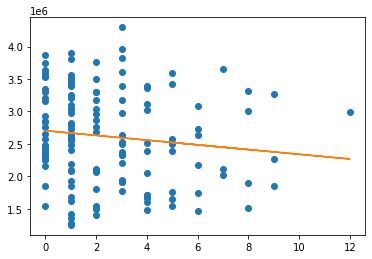

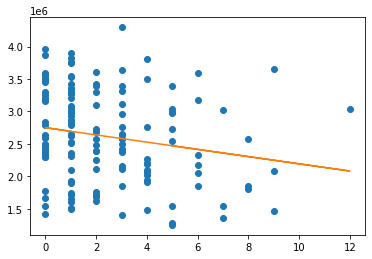

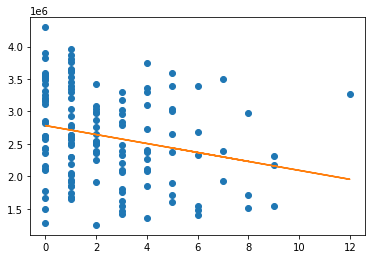

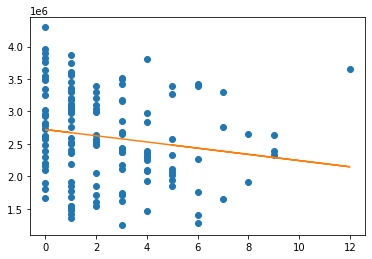

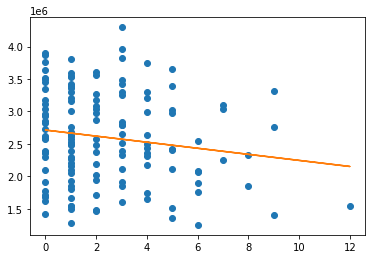

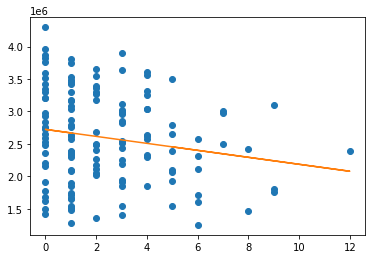

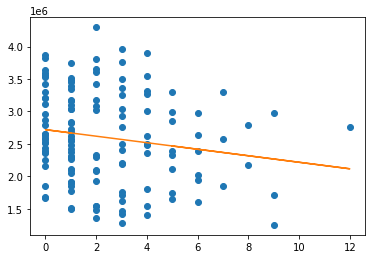

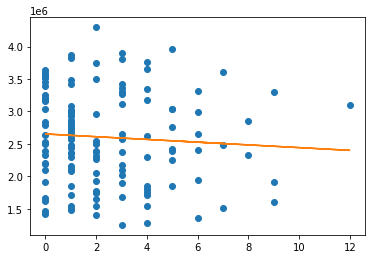

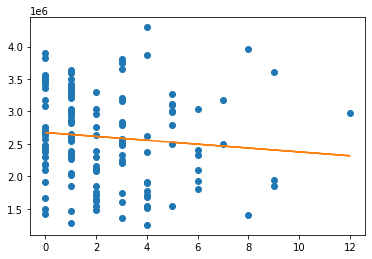

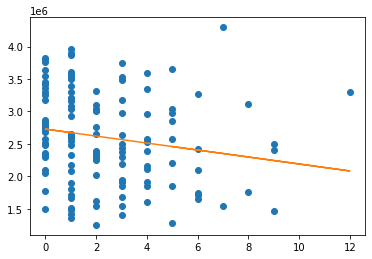

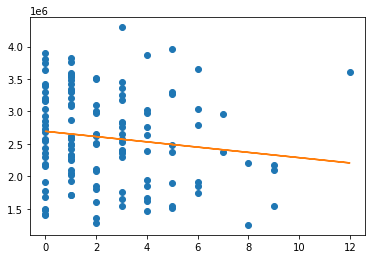

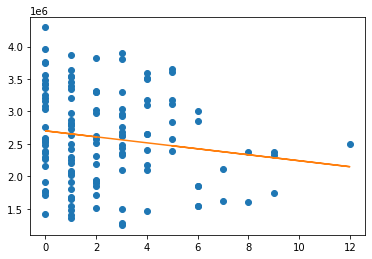

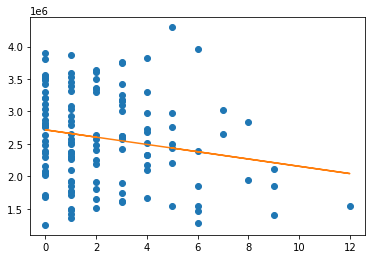

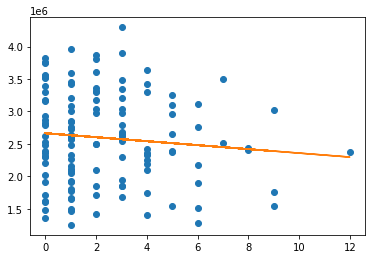

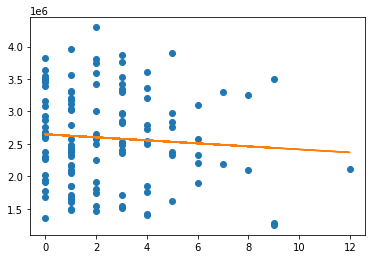

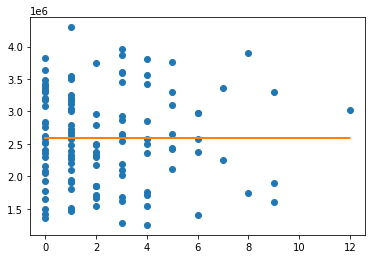

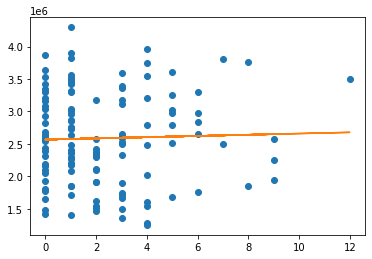

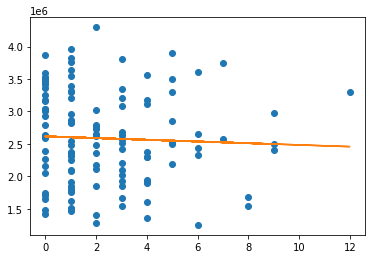

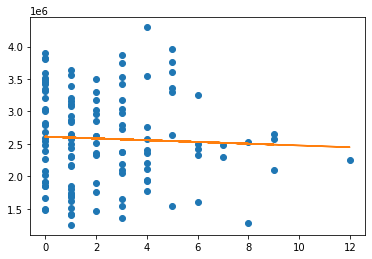

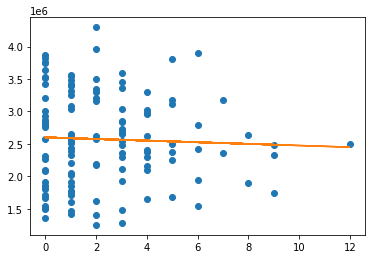

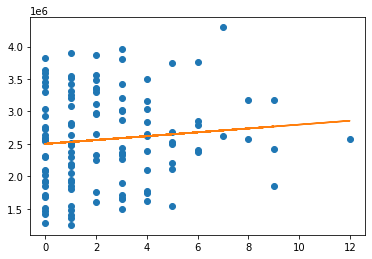

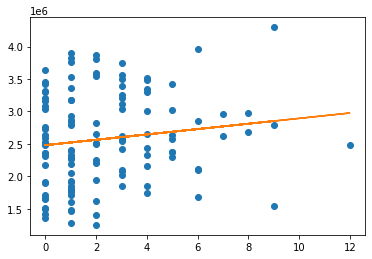

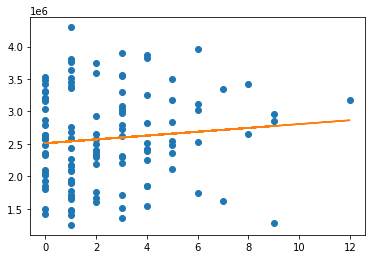

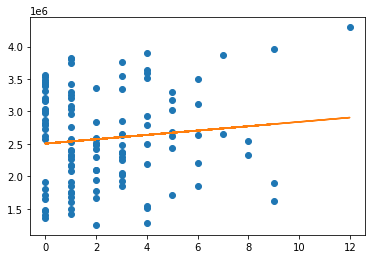

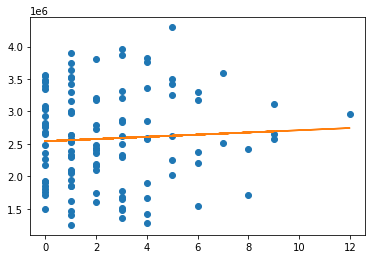

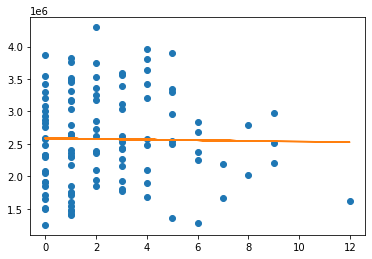

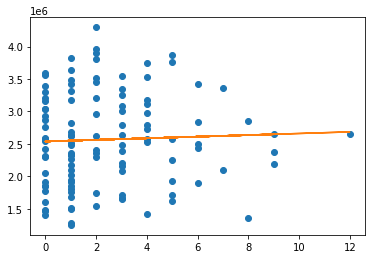

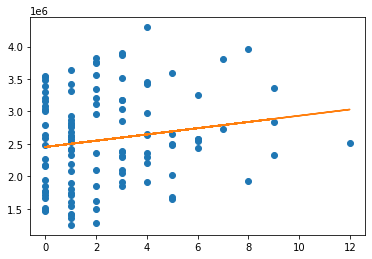

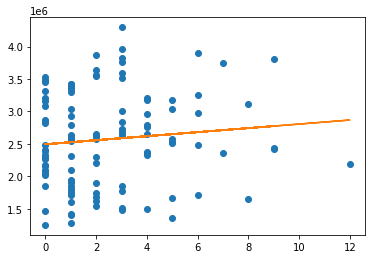

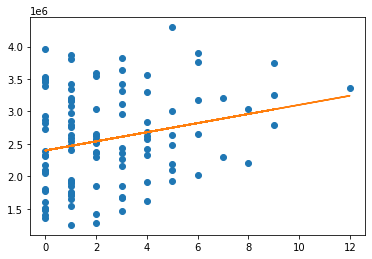

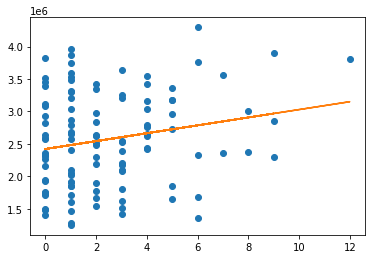

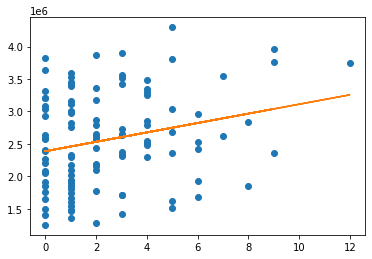

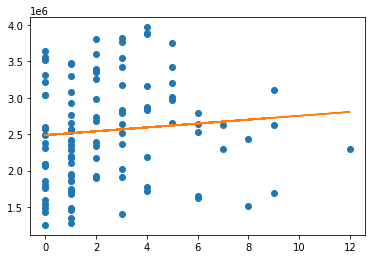

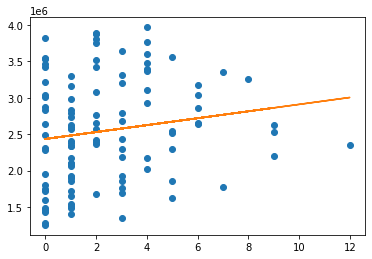

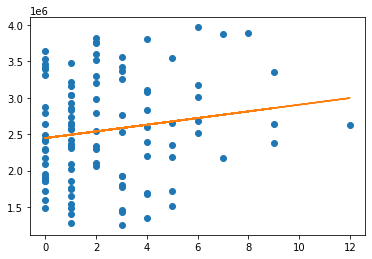

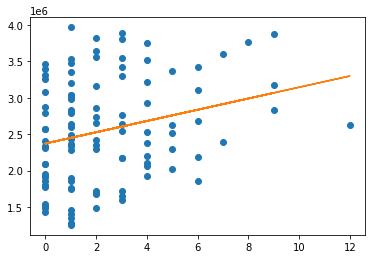

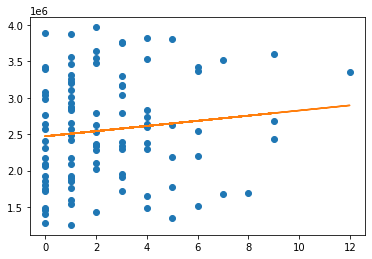

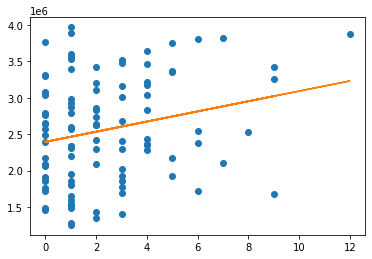

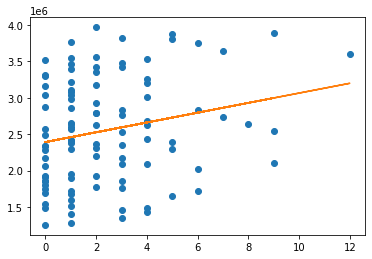

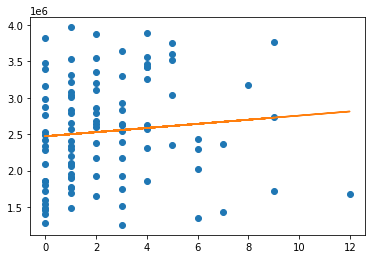

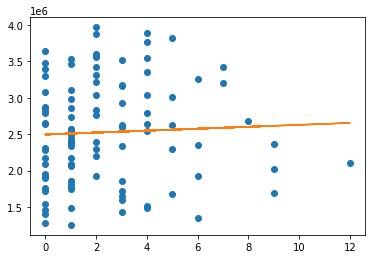

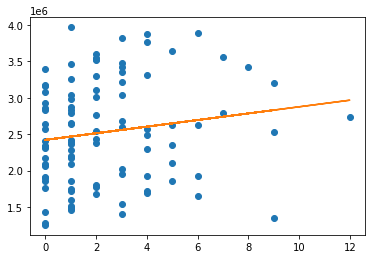

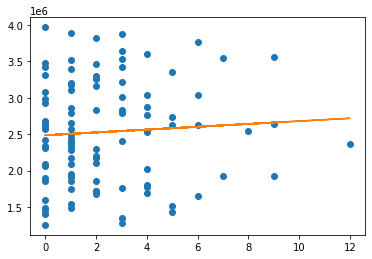

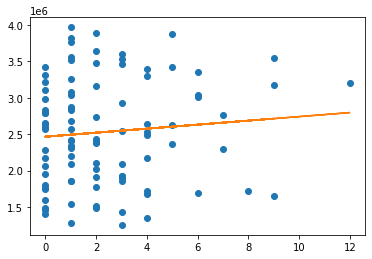

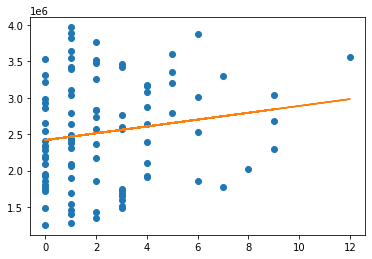

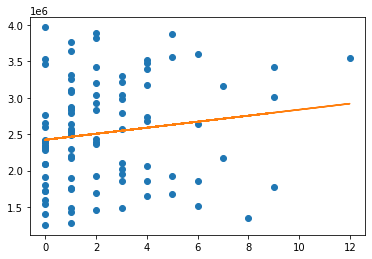

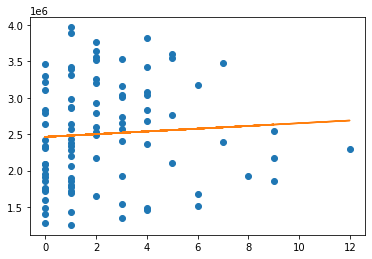

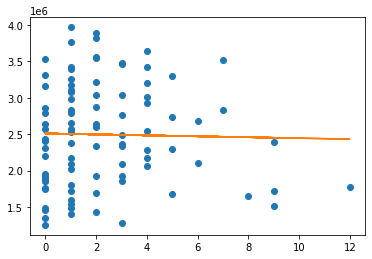

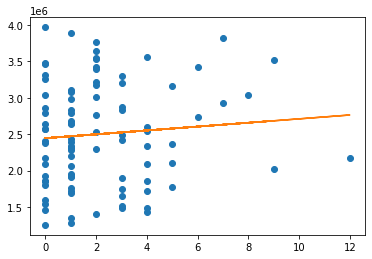

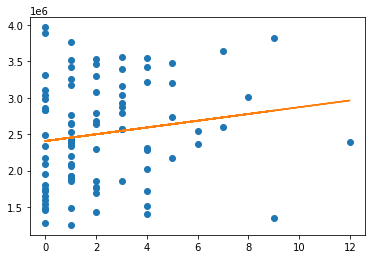

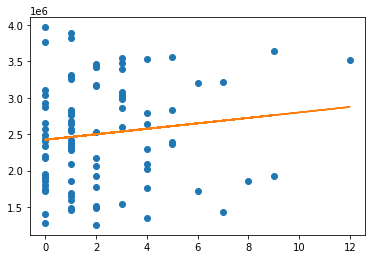

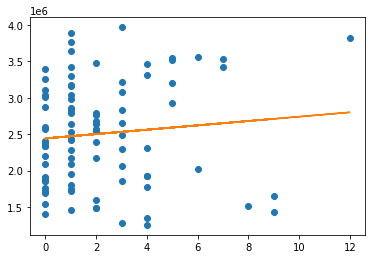

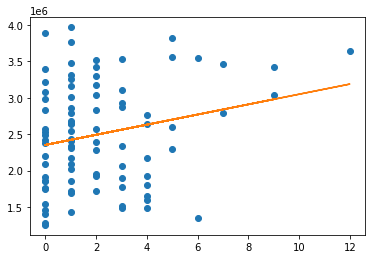

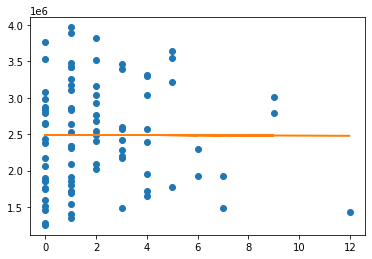

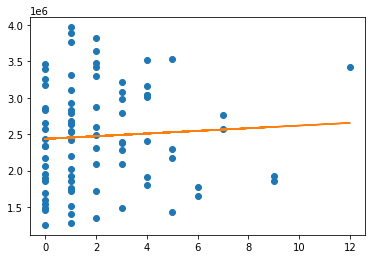

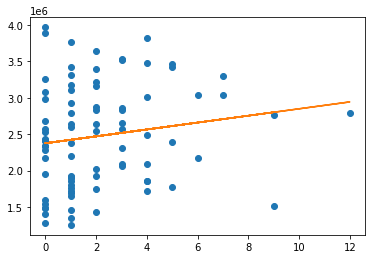

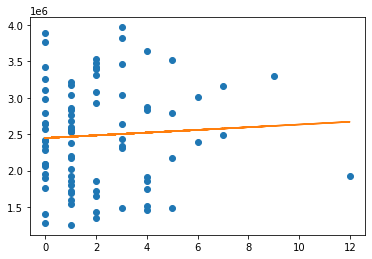

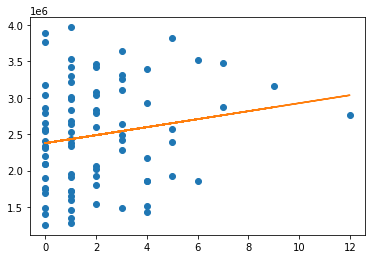

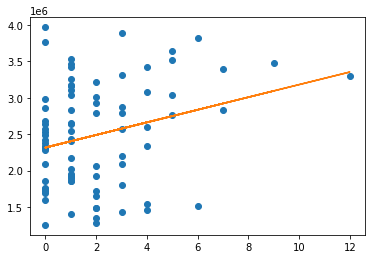

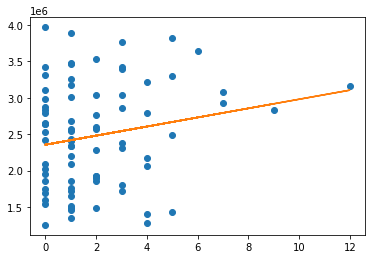

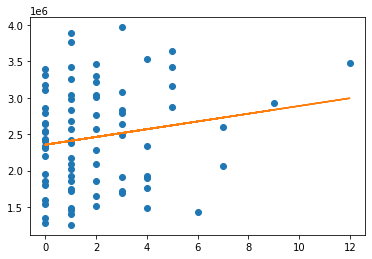

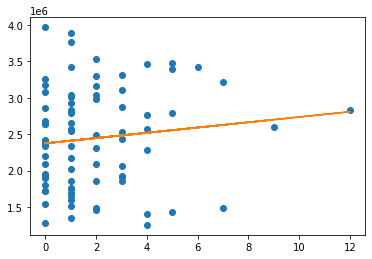

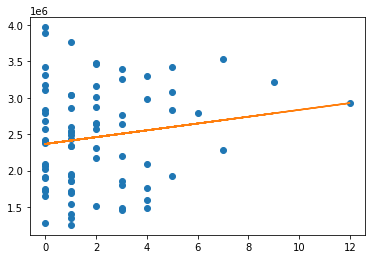

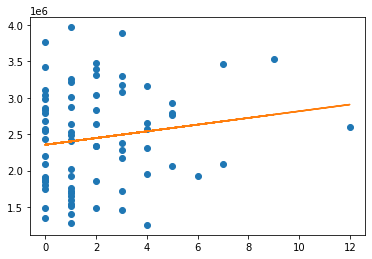

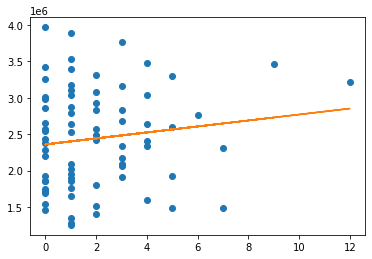

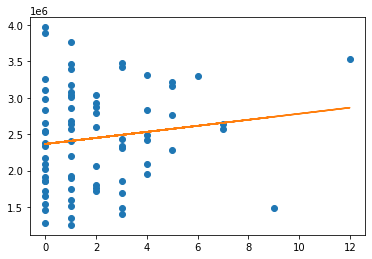

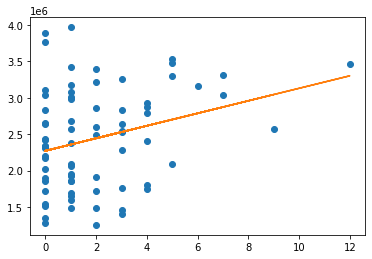

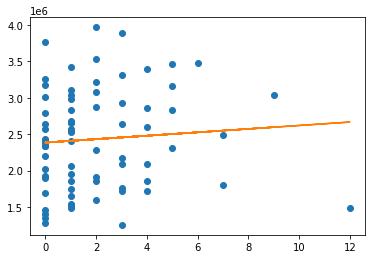

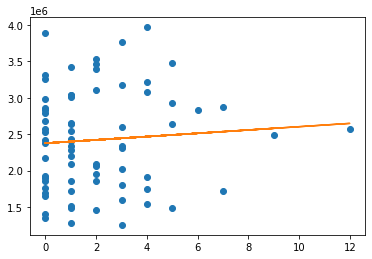

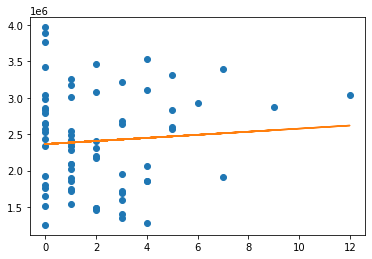

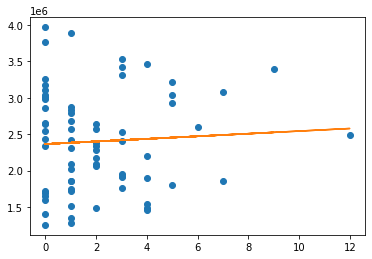

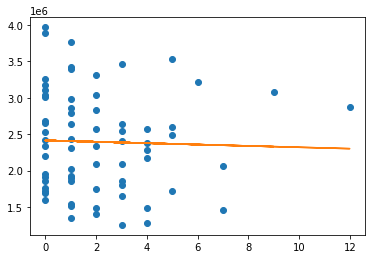

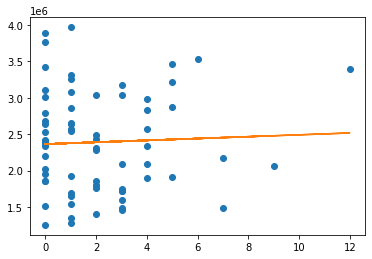

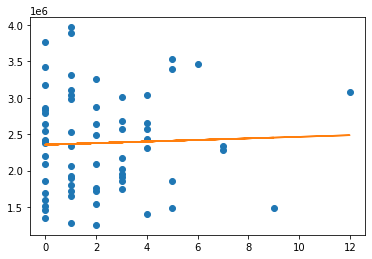

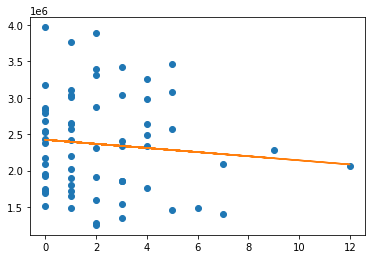

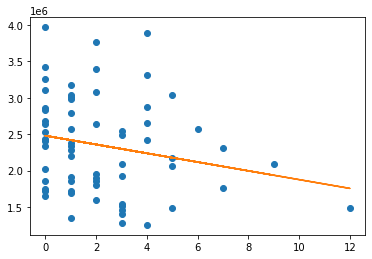

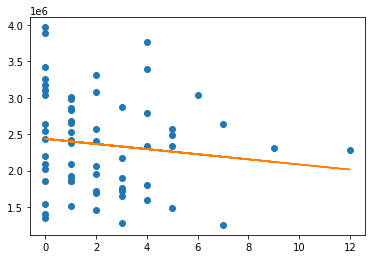

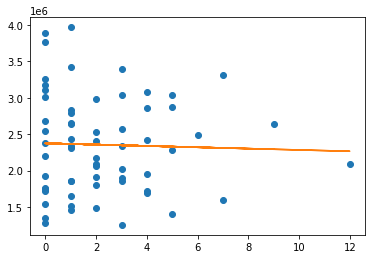

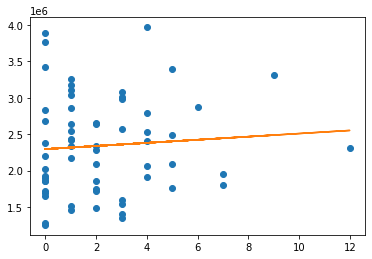

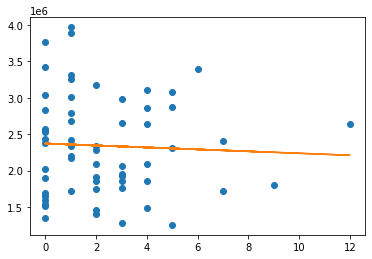

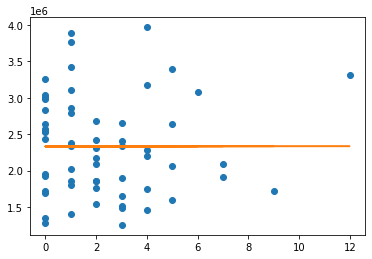

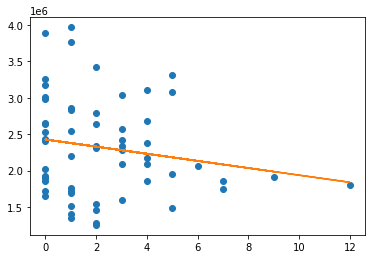

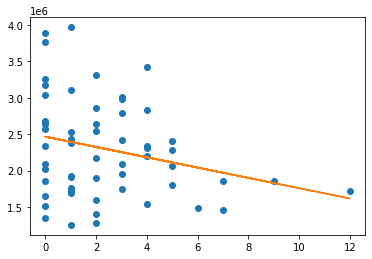

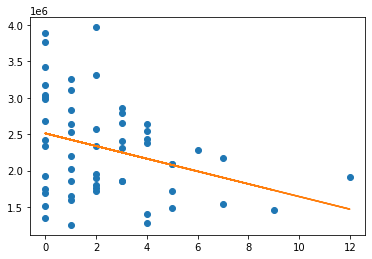

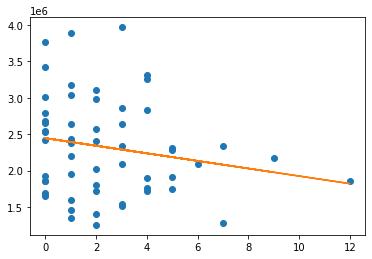

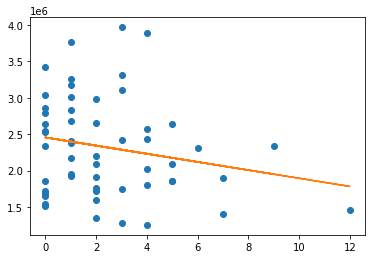

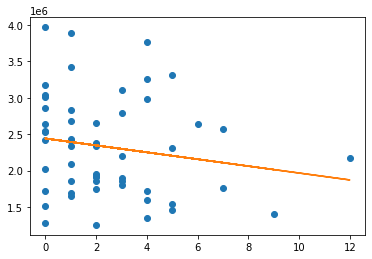

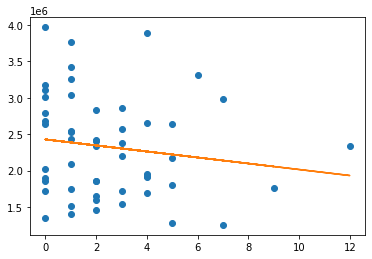

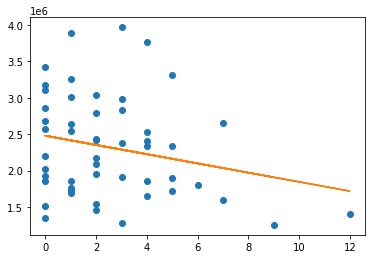

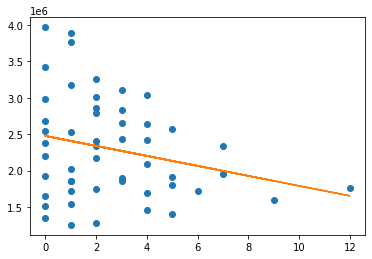

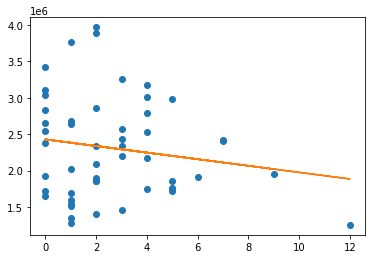

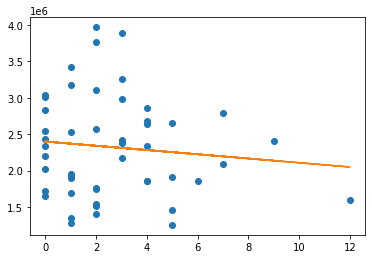

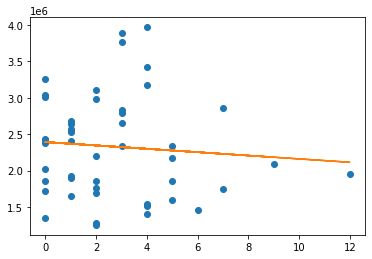

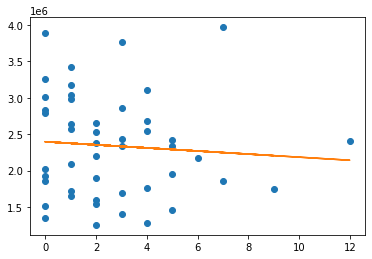

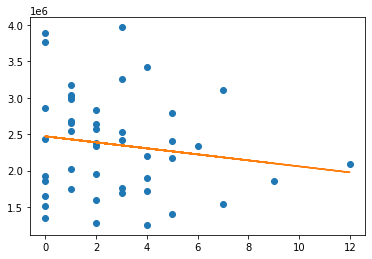

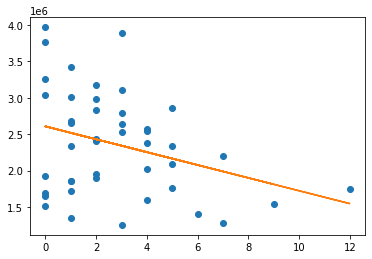

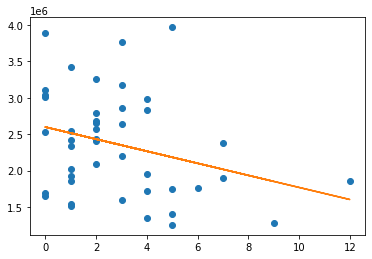

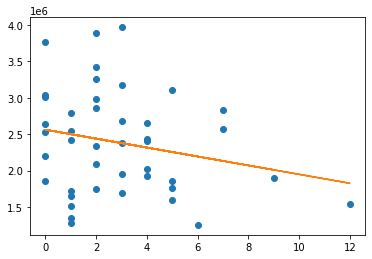

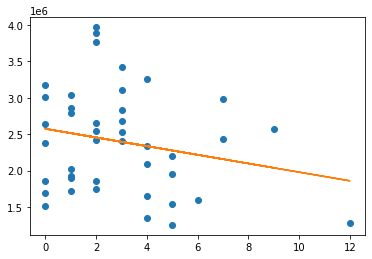

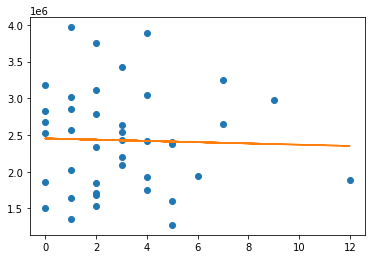

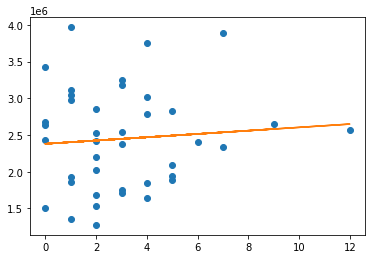

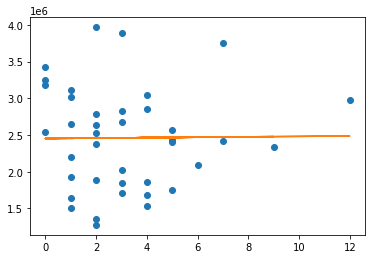

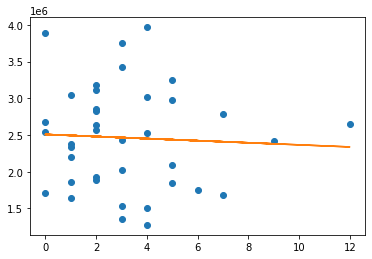

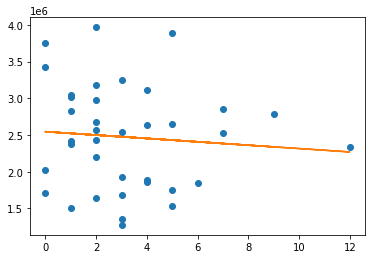

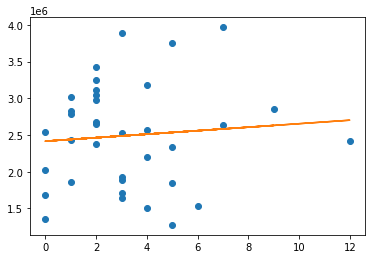

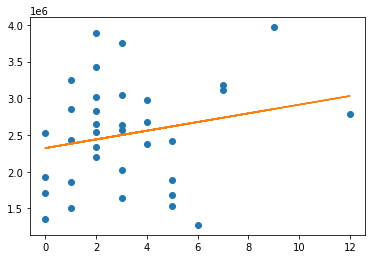

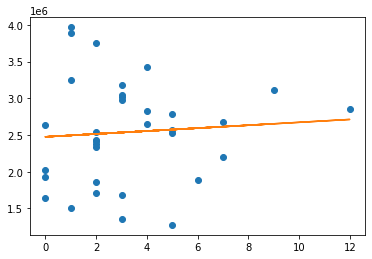

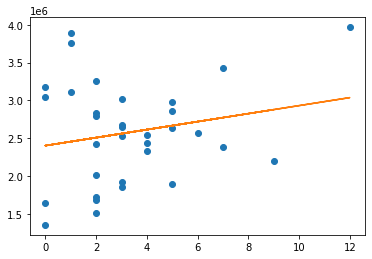

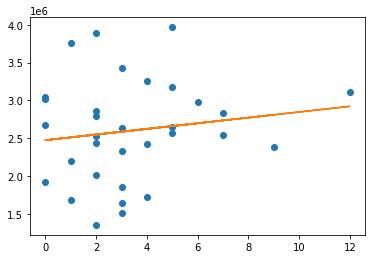

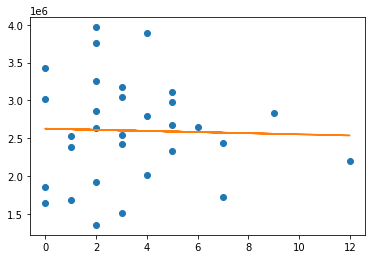

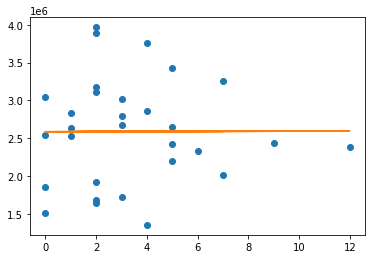

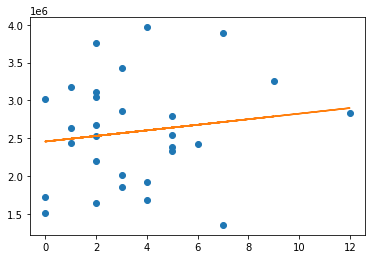

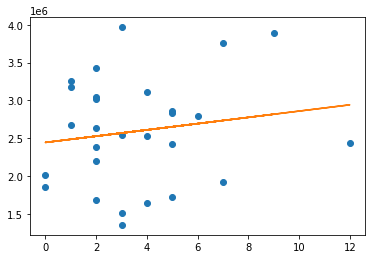

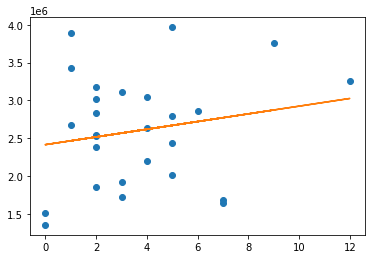

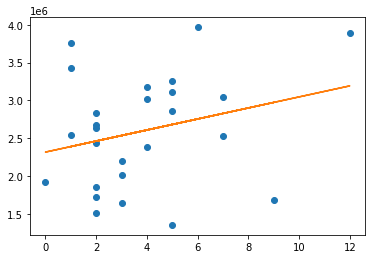

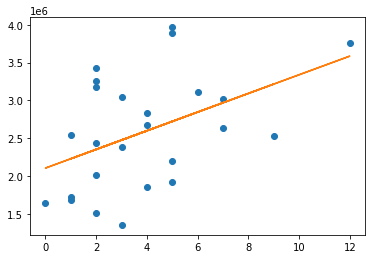

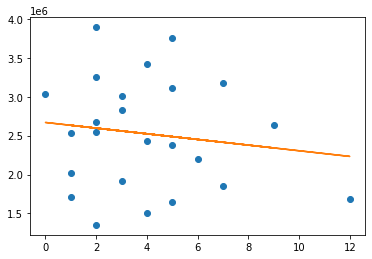

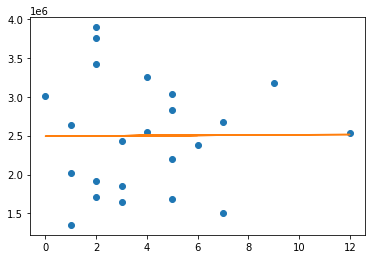

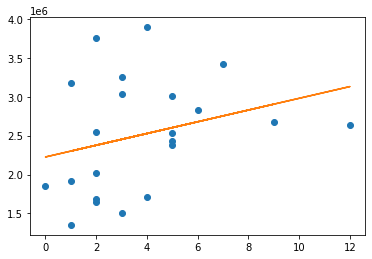

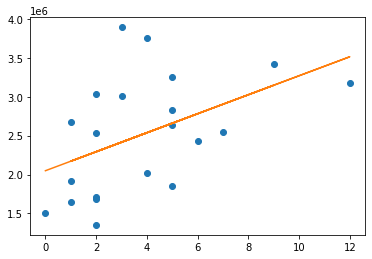

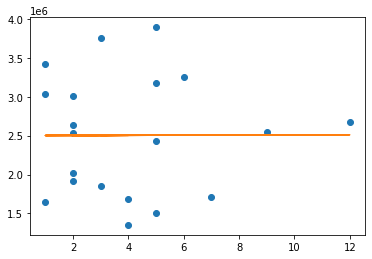

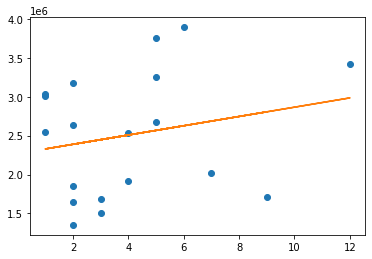

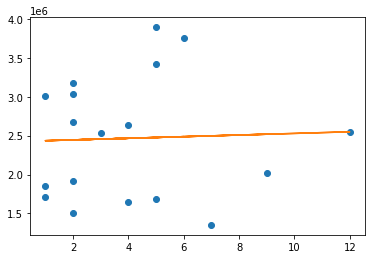

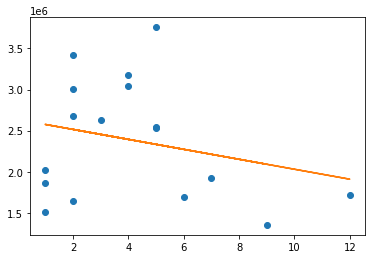

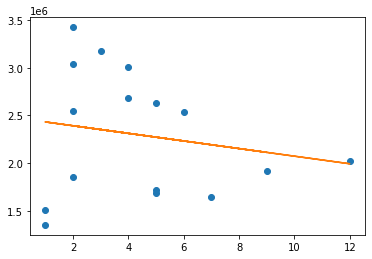

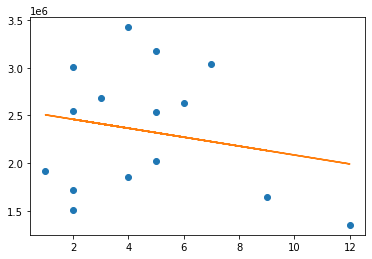

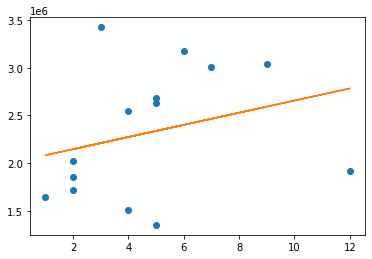

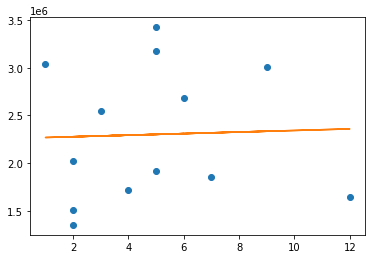

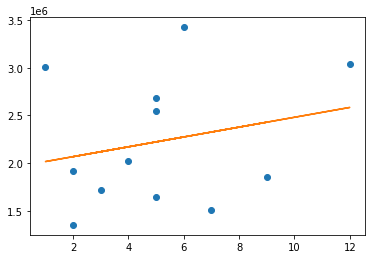

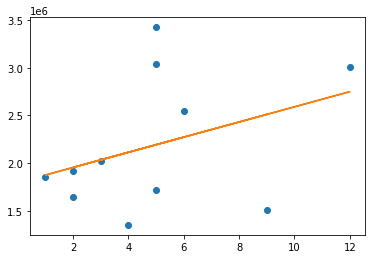

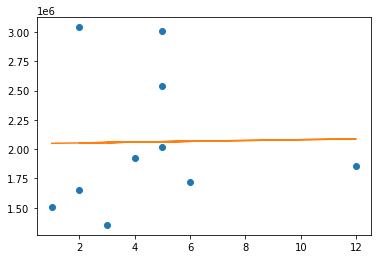

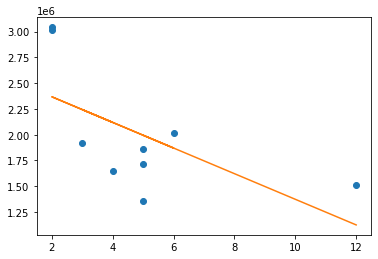

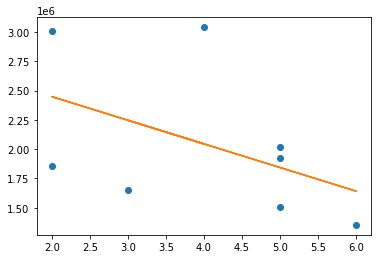

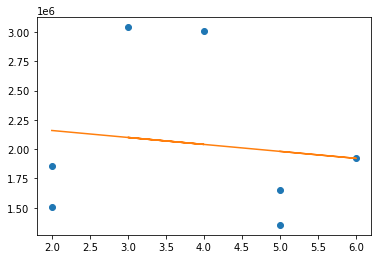

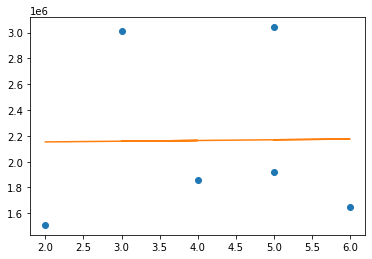

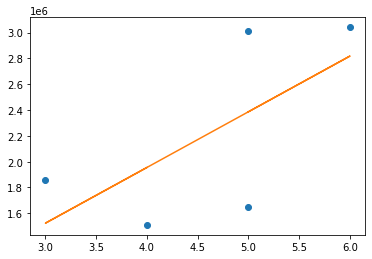

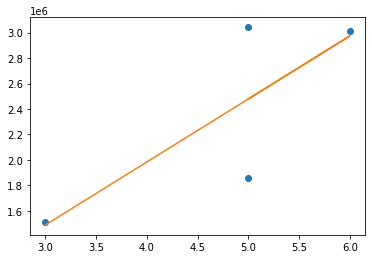

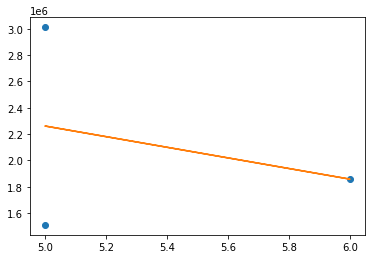

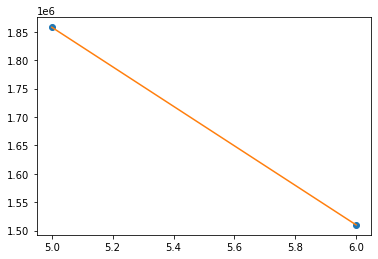

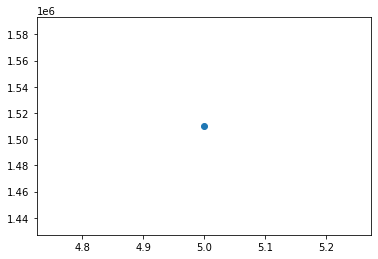

In [79]:
for a in range(1, len(x2)) :
    x_2 = x2[:-a]
    y_2 = y2[a:].reset_index(drop = True)
    
    line_fitter2 = LinearRegression()
    line_fitter2.fit(x_2.values.reshape(-1, 1), y_2)
    
    plt.plot(x_2, y_2, 'o')
    plt.plot(x_2, line_fitter2.predict(x_2.values.reshape(-1, 1)))
    plt.show()
   # plt.savefig('fig{}.png' .format(200-a), dpi=300)
   # time.sleep(1)

## 달서구 확진자 수 VS 상인점 매출

### x = 확진자 수, y = 매출

In [36]:
dal_sang = pd.DataFrame()
dal_sang['covid'] = df_covid['달서']
dal_sang['상인'] = [int(b.replace(',', '')) for b in df_sales['무보까국밥(상인점)']]
dal_sang

,covid,상인
0,5,860000
1,6,874500
2,5,712500
3,3,900500
4,4,787000
...,...,...
195,5,922500
196,6,1174000
197,12,1432500
198,4,783000


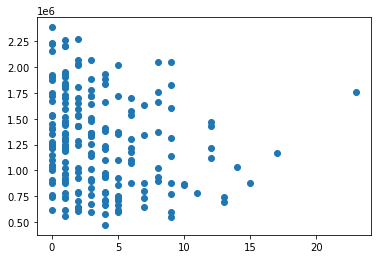

In [94]:
x3 = dal_sang['covid']
y3 = dal_sang['상인']
plt.plot(x3, y3, 'o')

In [95]:
line_fitter3 = LinearRegression()
line_fitter3.fit(x3.values.reshape(-1, 1), y3) ## x 는 2차원이여야하기 때문에 reshape

LinearRegression()

In [96]:
print(line_fitter3.predict([[10]])) # 855,000
print(line_fitter3.predict([[7]])) # 772,500
print(line_fitter3.predict([[14]])) # 1,085,500
print(line_fitter3.predict([[10]])) # 1,320,000

[1132610.849334]
[1197132.64871064]
[1046581.78349849]
[1132610.849334]


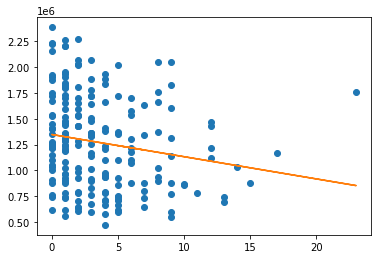

In [40]:
plt.plot(x3, y3, 'o')
plt.plot(x3, line_fitter3.predict(x2.values.reshape(-1,1)))
plt.show()